# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [3]:
city_names_ls = []
cloudiness_ls = []
country_ls = []
date_ls = []
humidity_ls = []
lat_ls = []
lng_ls = []
max_temp_ls = []
wind_speed_ls = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(url + city).json()
        city_names_ls.append(response["name"])
        cloudiness_ls.append(response["clouds"]["all"])
        country_ls.append(response["sys"]["country"])
        date_ls.append(response["dt"])
        humidity_ls.append(response["main"]["humidity"])
        lat_ls.append(response["coord"]["lat"])
        lng_ls.append(response["coord"]["lon"])
        max_temp_ls.append(response["main"]["temp_max"])
        wind_speed_ls.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
  

print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 : vaini
Processing Record 2 of Set 1 : albany
Processing Record 3 of Set 1 : faanui
Processing Record 4 of Set 1 : la ronge
Processing Record 5 of Set 1 : joshimath
City not found. Skipping...
Processing Record 6 of Set 1 : hobart
Processing Record 7 of Set 1 : yellowknife
Processing Record 8 of Set 1 : sao filipe
Processing Record 9 of Set 1 : saint george
Processing Record 10 of Set 1 : ancud
Processing Record 11 of Set 1 : hermanus
Processing Record 12 of Set 1 : puerto ayora
Processing Record 13 of Set 1 : chokurdakh
Processing Record 14 of Set 1 : esperance
Processing Record 15 of Set 1 : auki
Processing Record 16 of Set 1 : leninskoye
Processing Record 17 of Set 1 : beausoleil
City not found. Skipping...
Processing Record 18 of Set 1 : tasiilaq
Processing Record 19 of Set 1 : shipunovo
Processing Record 20 of Set 1 : thompson
City not found. Skipping...
Processing Record 21 of Set 1 : kapaa
Proc

Processing Record 35 of Set 4 : urucara
Processing Record 36 of Set 4 : severo-kurilsk
Processing Record 37 of Set 4 : south venice
Processing Record 38 of Set 4 : longyearbyen
Processing Record 39 of Set 4 : katherine
City not found. Skipping...
Processing Record 40 of Set 4 : jimenez
Processing Record 41 of Set 4 : sayyan
Processing Record 42 of Set 4 : valdivia
Processing Record 43 of Set 4 : leshukonskoye
Processing Record 44 of Set 4 : ahipara
Processing Record 45 of Set 4 : bud
Processing Record 46 of Set 4 : jega
Processing Record 47 of Set 4 : mitzic
Processing Record 48 of Set 4 : harer
Processing Record 49 of Set 4 : bandarbeyla
Processing Record 50 of Set 4 : cabedelo
Processing Record 0 of Set 5 : san juan
Processing Record 1 of Set 5 : vanimo
Processing Record 2 of Set 5 : amposta
Processing Record 3 of Set 5 : tottenham
City not found. Skipping...
Processing Record 4 of Set 5 : haines junction
Processing Record 5 of Set 5 : novobirilyussy
Processing Record 6 of Set 5 : ma

City not found. Skipping...
Processing Record 19 of Set 8 : tuatapere
Processing Record 20 of Set 8 : ambon
Processing Record 21 of Set 8 : panaba
Processing Record 22 of Set 8 : luangwa
Processing Record 23 of Set 8 : kashi
Processing Record 24 of Set 8 : raudeberg
Processing Record 25 of Set 8 : nizhniy mamon
City not found. Skipping...
Processing Record 26 of Set 8 : ust-ilimsk
Processing Record 27 of Set 8 : eugene
Processing Record 28 of Set 8 : richards bay
Processing Record 29 of Set 8 : itupiranga
Processing Record 30 of Set 8 : coahuayana
Processing Record 31 of Set 8 : chardara
Processing Record 32 of Set 8 : mina
City not found. Skipping...
Processing Record 33 of Set 8 : barda
Processing Record 34 of Set 8 : bolivar
Processing Record 35 of Set 8 : alofi
Processing Record 36 of Set 8 : axim
Processing Record 37 of Set 8 : poshekhonye
Processing Record 38 of Set 8 : kehychivka
Processing Record 39 of Set 8 : labuhan
Processing Record 40 of Set 8 : diffa
Processing Record 41 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({ 
                "City" : city_names_ls,
                "Cloudiness" : cloudiness_ls,
                "Country" : country_ls,
                "Date" : date_ls,
                "Humidity" : humidity_ls,
                "Lat" : lat_ls,
                "Lng" : lng_ls,
                "Max Temp" : max_temp_ls,
                "Wind Speed" : wind_speed_ls
})
weather_df.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [6]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,40,TO,1594693359,69,-21.20,-175.20,75.20,9.17
1,Albany,12,US,1594693490,65,42.60,-73.97,75.99,6.64
2,Faanui,100,PF,1594693552,81,-16.48,-151.75,79.21,15.46
3,La Ronge,75,CA,1594693530,59,55.10,-105.28,62.60,10.29
4,Joshīmath,53,IN,1594693643,50,30.57,79.57,70.02,1.54
...,...,...,...,...,...,...,...,...,...
545,Kota Belud,20,MY,1594693760,83,6.35,116.43,84.20,3.36
546,Orangeburg,75,US,1594693760,74,33.49,-80.86,82.00,6.93
547,Hamada,75,JP,1594693761,78,34.88,132.08,77.00,11.41
548,Ayabaca,100,PE,1594693761,100,-4.64,-79.71,51.94,3.91


In [16]:
weather_df.to_csv('../output_data/cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

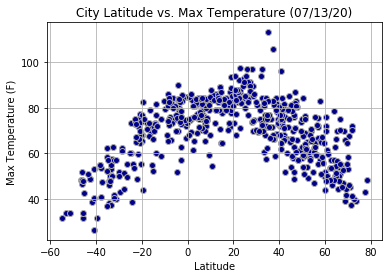

In [22]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "darkblue", edgecolor = "darkgrey")

plt.title("City Latitude vs. Max Temperature (07/13/20)")

plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("../Images/City Latitude vs Max Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

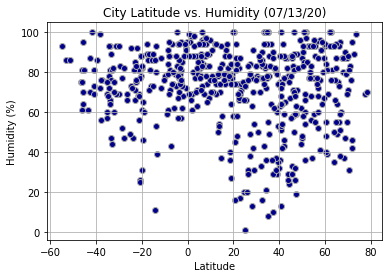

In [23]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "darkblue", edgecolor = "darkgrey")

plt.title("City Latitude vs. Humidity (07/13/20)")

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("../Images/City Latitude vs Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

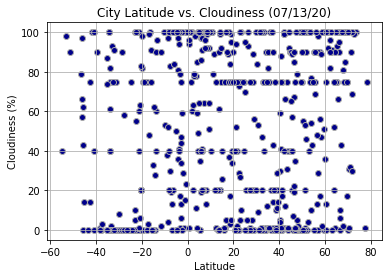

In [24]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "darkblue", edgecolor = "darkgrey")

plt.title("City Latitude vs. Cloudiness (07/13/20)")

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("../Images/City Latitude vs Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

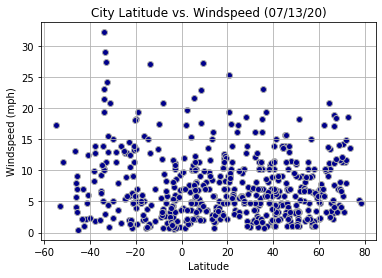

In [25]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "darkblue", edgecolor = "darkgrey")

plt.title("City Latitude vs. Windspeed (07/13/20)")

plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("../Images/City Latitude vs Windspeed.png")

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression